In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import numpy as np

## Read in training data

In [6]:
TRAINING_DATASET = "tap_fun_train.csv"

In [7]:
training_df = pd.read_csv("./data/" + TRAINING_DATASET)

In [8]:
training_df.columns.values, len(training_df.columns.values)

(array(['user_id', 'register_time', 'wood_add_value', 'wood_reduce_value',
        'stone_add_value', 'stone_reduce_value', 'ivory_add_value',
        'ivory_reduce_value', 'meat_add_value', 'meat_reduce_value',
        'magic_add_value', 'magic_reduce_value', 'infantry_add_value',
        'infantry_reduce_value', 'cavalry_add_value',
        'cavalry_reduce_value', 'shaman_add_value', 'shaman_reduce_value',
        'wound_infantry_add_value', 'wound_infantry_reduce_value',
        'wound_cavalry_add_value', 'wound_cavalry_reduce_value',
        'wound_shaman_add_value', 'wound_shaman_reduce_value',
        'general_acceleration_add_value',
        'general_acceleration_reduce_value',
        'building_acceleration_add_value',
        'building_acceleration_reduce_value',
        'reaserch_acceleration_add_value',
        'reaserch_acceleration_reduce_value',
        'training_acceleration_add_value',
        'training_acceleration_reduce_value',
        'treatment_acceleraion_add_valu

In [9]:
training_df.head()

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
0,1,2018-02-02 19:47:15,20125.0,3700.0,0.0,0.0,0.0,0.0,16375.0,2000.0,...,0,0,0,0,0,0,0.333333,0.0,0,0.0
1,1593,2018-01-26 00:01:05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.333333,0.0,0,0.0
2,1594,2018-01-26 00:01:58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1.166667,0.0,0,0.0
3,1595,2018-01-26 00:02:13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,3.166667,0.0,0,0.0
4,1596,2018-01-26 00:02:46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,2.333333,0.0,0,0.0


## Check spender vs. non-spender by D45

In [ ]:
## Label spender and non-spender
training_df['spender_label'] = training_df.apply(
    lambda row: 'spender' if row['prediction_pay_price'] > 0 else 'non-spender',
    axis=1
)

In [ ]:
training_df.groupby('spender_label')['user_id'].agg('count')

## Plot histogram of spenders (for a specific spending range)

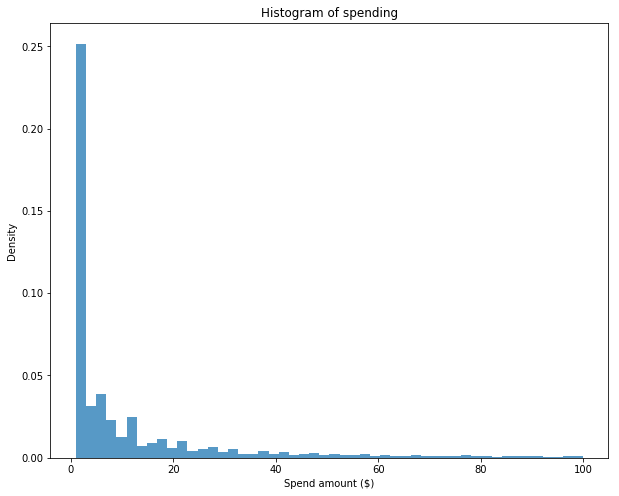

In [22]:
spend_lower = 0
spend_upper = 100

plt.figure(figsize=(10,8))

n, bins, patches = plt.hist(training_df[(training_df['prediction_pay_price'] > spend_lower) 
                                        & (training_df['prediction_pay_price'] <= spend_upper)].prediction_pay_price, 
                            50, density=True, alpha=0.75)

plt.xlabel('Spend amount ($)')
plt.ylabel('Density')
plt.title('Histogram of spending')
plt.show()

## Predicting spender/non-spender 

### Getting data ready for TensorFlow

In [15]:
from tensorflow import keras

# Helper libraries
import numpy as np
from sklearn.model_selection import train_test_split

In [81]:
## Working with training data only
X_havespent = training_df.iloc[:,2:108]
y_havespent = (training_df.prediction_pay_price-training_df.pay_price>0) * 1

## Make train and test data sets
X, X_val, y, y_val = train_test_split(X_havespent, y_havespent, test_size=0.2, stratify=y_havespent)

In [82]:
len(X.values[0]), len(X.values[1])

(106, 106)

### Building the model

In [97]:

# model = keras.Sequential()
# model.add(keras.layers.Embedding(input_dim=106, output_dim=16, input_length = 1000))
# model.add(keras.layers.GlobalAveragePooling1D())
# model.add(keras.layers.Dense(16, activation=tf.nn.relu))
# model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))
model = keras.Sequential()
# Adds a densely-connected layer with 64 units to the model:
model.add(keras.layers.Dense(200, activation=tf.nn.relu))
# Add another:
model.add(keras.layers.Dense(64, activation=tf.nn.relu))
# Add a softmax layer with 1 output units:
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))


In [98]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Traing the model

In [106]:
len(y_val.values)

457602

In [108]:
num_for_val = 300000

In [113]:
history = model.fit(X.values,
                    y.values,
                    epochs=3,
                    batch_size=1000,
                    validation_data=(X_val.values[:num_for_val], y_val.values[:num_for_val]),
                    verbose=1)

Train on 1830405 samples, validate on 300000 samples
Epoch 1/3
1830405/1830405 [==============================] - 18s 10us/step - loss: 0.1117 - acc: 0.9931 - val_loss: 0.1100 - val_acc: 0.9932
Epoch 2/3
1830405/1830405 [==============================] - 18s 10us/step - loss: 0.1117 - acc: 0.9931 - val_loss: 0.1100 - val_acc: 0.9932
Epoch 3/3
1830405/1830405 [==============================] - 18s 10us/step - loss: 0.1117 - acc: 0.9931 - val_loss: 0.1100 - val_acc: 0.9932


In [114]:
model.evaluate(X_val.values[num_for_val:], y_val.values[num_for_val:])

157602/157602 [==============================] - 3s 21us/step


[0.11495256074135715, 0.9928681108107765]

In [116]:
tf.metrics.false_negatives(
    y_val.values[num_for_val:],
    model.predict(X_val.values[num_for_val:])
)

(<tf.Tensor 'false_negatives/Identity:0' shape=() dtype=float32>,
 <tf.Tensor 'false_negatives/AssignAdd:0' shape=() dtype=float32_ref>)

In [125]:
a,b = tf.metrics.auc(
    y_val.values[num_for_val:],
    model.predict(X_val.values[num_for_val:])
)



AttributeError: 'Tensor' object has no attribute 'values'

### Playing with TF

In [27]:
## Get some sample data
n_samples = 400
data = np.asarray(training_df[training_df['pay_price'] > 0][['pay_price', 'prediction_pay_price']].head(n_samples))
data

array([[9.90000e-01, 9.90000e-01],
       [2.97000e+00, 4.96000e+00],
       [1.29700e+01, 1.29700e+01],
       [9.90000e-01, 9.90000e-01],
       [9.90000e-01, 9.90000e-01],
       [1.56880e+02, 1.66860e+02],
       [2.69400e+01, 2.69400e+01],
       [9.99000e+00, 9.99000e+00],
       [1.49800e+01, 1.99700e+01],
       [9.90000e-01, 9.90000e-01],
       [1.98000e+00, 1.98000e+00],
       [4.06870e+02, 8.98278e+03],
       [9.90000e-01, 9.90000e-01],
       [9.90000e-01, 9.90000e-01],
       [1.69600e+01, 1.69600e+01],
       [6.97000e+00, 8.96000e+00],
       [1.59700e+01, 1.59700e+01],
       [1.65910e+02, 1.85858e+03],
       [5.69300e+01, 1.67730e+02],
       [9.90000e-01, 9.90000e-01],
       [1.09700e+01, 1.09700e+01],
       [9.90000e-01, 1.98000e+00],
       [9.90000e-01, 9.90000e-01],
       [9.90000e-01, 9.90000e-01],
       [1.98000e+00, 1.98000e+00],
       [9.90000e-01, 9.90000e-01],
       [9.90000e-01, 9.90000e-01],
       [9.90000e-01, 5.98000e+00],
       [9.90000e-01,

In [86]:
## Create placeholders for input and output
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

## Create weight and bias, initialized to 0
weight = tf.Variable(0.0, name='weight')
bias = tf.Variable(0.0, name='bias')

## Build OLS model to predict Y using X
Y_predicted = X * weight + bias

## Use square error as the loss function
loss = tf.square(Y - Y_predicted, name='loss')

## Using gradient descent with learning rate 0.001 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.000000001).minimize(loss)

## Use a session to execute the model
with tf.Session() as sess:
    ## initialize necessary variables, i.e., weight and bias
    sess.run(tf.global_variables_initializer())
    
    writer = tf.summary.FileWriter("./graphs/my_graph_ols", sess.graph)
    
    ## train the model
    for i in range(1000): ## train the model 100 times
        total_loss = 0.0
        for x,y in data:
            _, l = sess.run([optimizer, loss], feed_dict={X:x, Y:y})
            total_loss += l
        print("Epoch {0}: {1}".format(i, total_loss / n_samples))
        
    writer.close()
    
    w_value, b_value = sess.run([weight, bias])

Epoch 0: 326724.3412022325
Epoch 1: 324236.91387447907
Epoch 2: 321789.0185635139
Epoch 3: 319379.90879509406
Epoch 4: 317009.0388090551
Epoch 5: 314675.7751263644
Epoch 6: 312379.54736767395
Epoch 7: 310119.729773581
Epoch 8: 307895.79230476276
Epoch 9: 305707.12963974325
Epoch 10: 303553.1810328572
Epoch 11: 301433.3794699623
Epoch 12: 299347.2087856885
Epoch 13: 297294.11683093786
Epoch 14: 295273.63652135246
Epoch 15: 293285.18500574894
Epoch 16: 291328.2530877711
Epoch 17: 289402.37898680015
Epoch 18: 287507.038547112
Epoch 19: 285641.8407001476
Epoch 20: 283806.12711202365
Epoch 21: 281999.5885446163
Epoch 22: 280221.7106578042
Epoch 23: 278472.00274540414
Epoch 24: 276750.0712205861
Epoch 25: 275055.49187876476
Epoch 26: 273387.77654579614
Epoch 27: 271746.53920655715
Epoch 28: 270131.26726647327
Epoch 29: 268541.65567712433
Epoch 30: 266977.2133250598
Epoch 31: 265437.60263994033
Epoch 32: 263922.40269914956
Epoch 33: 262431.2711235128
Epoch 34: 260963.74685156115
Epoch 35: 259

Epoch 281: 171656.39432491973
Epoch 282: 171628.5205505085
Epoch 283: 171601.09078128205
Epoch 284: 171574.09153340466
Epoch 285: 171547.52683304742
Epoch 286: 171521.38509320832
Epoch 287: 171495.66318754115
Epoch 288: 171470.3257377798
Epoch 289: 171445.4111866378
Epoch 290: 171420.8915843038
Epoch 291: 171396.76660228072
Epoch 292: 171373.0067733881
Epoch 293: 171349.62149967492
Epoch 294: 171326.59016325048
Epoch 295: 171303.95980223507
Epoch 296: 171281.68492958194
Epoch 297: 171259.75057244248
Epoch 298: 171238.16592058077
Epoch 299: 171216.9308707416
Epoch 300: 171196.02936216482
Epoch 301: 171175.46567096605
Epoch 302: 171155.203112541
Epoch 303: 171135.2646563601
Epoch 304: 171115.64199136838
Epoch 305: 171096.3405153533
Epoch 306: 171077.33395471162
Epoch 307: 171058.62890442996
Epoch 308: 171040.22688005268
Epoch 309: 171022.12221614353
Epoch 310: 171004.2870108279
Epoch 311: 170986.7549519939
Epoch 312: 170969.49380465894
Epoch 313: 170952.5103264191
Epoch 314: 170935.78155

Epoch 559: 169916.29637102227
Epoch 560: 169915.98163002008
Epoch 561: 169915.63338072025
Epoch 562: 169915.31403964694
Epoch 563: 169914.99477930582
Epoch 564: 169914.67303425955
Epoch 565: 169914.36877527917
Epoch 566: 169914.0781436229
Epoch 567: 169913.77071950067
Epoch 568: 169913.4691588122
Epoch 569: 169913.18588074128
Epoch 570: 169912.8984439148
Epoch 571: 169912.62545244745
Epoch 572: 169912.34400761224
Epoch 573: 169912.0808343202
Epoch 574: 169911.8184835279
Epoch 575: 169911.56331777843
Epoch 576: 169911.27873012904
Epoch 577: 169911.04341491175
Epoch 578: 169910.78529602222
Epoch 579: 169910.54237773758
Epoch 580: 169910.30860727036
Epoch 581: 169910.04562133216
Epoch 582: 169909.81793017642
Epoch 583: 169909.59141177507
Epoch 584: 169909.36147098563
Epoch 585: 169909.13114222608
Epoch 586: 169908.92623202933
Epoch 587: 169908.701250057
Epoch 588: 169908.48187628403
Epoch 589: 169908.28223726206
Epoch 590: 169908.0752960585
Epoch 591: 169907.8661982517
Epoch 592: 169907.6

Epoch 835: 169895.1533413038
Epoch 836: 169895.15184582755
Epoch 837: 169895.13775420614
Epoch 838: 169895.14069148764
Epoch 839: 169895.1266037661
Epoch 840: 169895.1469535113
Epoch 841: 169895.12822734565
Epoch 842: 169895.11573509022
Epoch 843: 169895.1212377345
Epoch 844: 169895.11371876916
Epoch 845: 169895.10056368
Epoch 846: 169895.1163169183
Epoch 847: 169895.11814129844
Epoch 848: 169895.09395744762
Epoch 849: 169895.09595935457
Epoch 850: 169895.10344223917
Epoch 851: 169895.08527789
Epoch 852: 169895.08602693805
Epoch 853: 169895.07849798547
Epoch 854: 169895.06905760625
Epoch 855: 169895.07554001696
Epoch 856: 169895.0783273162
Epoch 857: 169895.0677163369
Epoch 858: 169895.0606604044
Epoch 859: 169895.04881610975
Epoch 860: 169895.05115605853
Epoch 861: 169895.04056408606
Epoch 862: 169895.04541140533
Epoch 863: 169895.0492949071
Epoch 864: 169895.03454144966
Epoch 865: 169895.0421562039
Epoch 866: 169895.02695572586
Epoch 867: 169895.02923670143
Epoch 868: 169895.01681145

In [88]:
w_value, b_value

(3.970052, 0.0069672302)

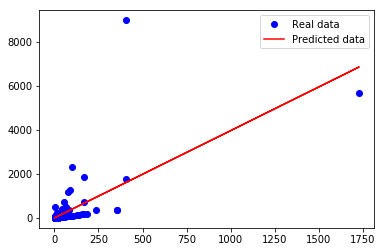

In [89]:
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label = 'Real data')
plt.plot(X, X * w_value + b_value, 'r', label = 'Predicted data')
plt.legend()
plt.show()

#### Comparing TF linear regression with scikit

Coefficients: 
 [[3.98069991]]
Mean squared error: 169820.95
[-2.44766214]


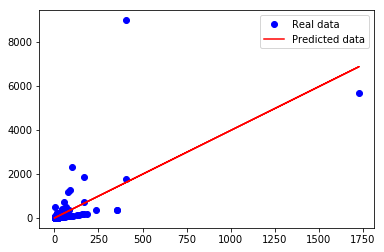

In [90]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X.reshape((n_samples, 1)), Y.reshape((n_samples, 1)))

# Make predictions using the testing set
Y_predicted_scikit = regr.predict(X.reshape((n_samples, 1)))

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y.reshape((n_samples, 1)), Y_predicted_scikit))

print(regr.intercept_)

# Plot outputs
plt.plot(X, Y, 'bo', label = 'Real data')
plt.plot(X, Y_predicted_scikit, 'r', label = 'Predicted data')
plt.legend()
plt.show()